## Optimizer in Neural Network Model

#### Binary Classification : Breast Cancer Case

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [4]:
cancer = load_breast_cancer()
cancer_std = StandardScaler().fit_transform(cancer.data)
X_train, X_test, y_train, y_test = train_test_split(
    cancer_std, cancer.target, stratify=cancer.target,
    test_size=0.2, random_state=2022
)

#### 1. Adam Optimizer

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(100, input_dim=30, activation='relu'),
    Dense(24, activation='relu'),
    Dense(1, activation='sigmoid')
])

#### Adam HyperParameters
- learning_rate: 0보다 크거나 같은 float 값. 학습률.
- beta_1: 0보다 크고 1보다 작은 float 값. 일반적으로 1에 가깝게 설정됩니다.
- beta_2: 0보다 크고 1보다 작은 float 값. 일반적으로 1에 가깝게 설정됩니다.
- epsilon: 0보다 크거나 같은 float형 fuzz factor. None인 경우 K.epsilon()이 사용됩니다.
- decay: 0보다 크거나 같은 float 값. 업데이트마다 적용되는 학습률의 감소율입니다.
- amsgrad: 불리언. Adam의 변형인 AMSGrad의 적용 여부를 설정합니다

In [15]:
from tensorflow.keras.optimizers import Adam
adam = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999,
            epsilon=None, decay=0.0, amsgrad=False)

model.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])
hist = model.fit(X_train, y_train, validation_split=0.2,
                 epochs=100, batch_size=100, verbose=2)

Epoch 1/100
4/4 - 0s - loss: 0.0051 - accuracy: 1.0000 - val_loss: 0.0989 - val_accuracy: 0.9670 - 416ms/epoch - 104ms/step
Epoch 2/100
4/4 - 0s - loss: 0.0044 - accuracy: 1.0000 - val_loss: 0.0986 - val_accuracy: 0.9670 - 24ms/epoch - 6ms/step
Epoch 3/100
4/4 - 0s - loss: 0.0044 - accuracy: 1.0000 - val_loss: 0.1024 - val_accuracy: 0.9780 - 29ms/epoch - 7ms/step
Epoch 4/100
4/4 - 0s - loss: 0.0036 - accuracy: 1.0000 - val_loss: 0.1023 - val_accuracy: 0.9670 - 27ms/epoch - 7ms/step
Epoch 5/100
4/4 - 0s - loss: 0.0032 - accuracy: 1.0000 - val_loss: 0.1021 - val_accuracy: 0.9670 - 26ms/epoch - 6ms/step
Epoch 6/100
4/4 - 0s - loss: 0.0030 - accuracy: 1.0000 - val_loss: 0.1015 - val_accuracy: 0.9670 - 25ms/epoch - 6ms/step
Epoch 7/100
4/4 - 0s - loss: 0.0027 - accuracy: 1.0000 - val_loss: 0.1008 - val_accuracy: 0.9670 - 29ms/epoch - 7ms/step
Epoch 8/100
4/4 - 0s - loss: 0.0024 - accuracy: 1.0000 - val_loss: 0.1035 - val_accuracy: 0.9670 - 28ms/epoch - 7ms/step
Epoch 9/100
4/4 - 0s - loss: 

In [9]:
model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 2ms/step - loss: 0.0514 - accuracy: 0.9825


[0.051370538771152496, 0.9824561476707458]

In [10]:
y_acc = hist.history['accuracy']
y_vloss = hist.history['val_loss']
xs = np.arange(1,len(y_acc)+1)

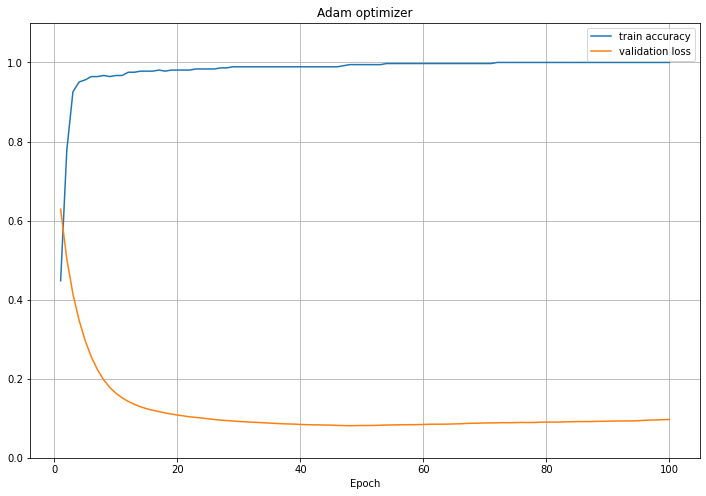

In [11]:
plt.figure(figsize=(12,8))
plt.plot(xs, y_acc, label='train accuracy')
plt.plot(xs, y_vloss, label='validation loss')
plt.legend()
plt.grid()
plt.ylim([0,1.1])
plt.xlabel('Epoch')
plt.title('Adam optimizer')
plt.show()

#### 2. RMSProp Optimizer

#### RMSProp HyperParameters
- lr: 0보다 크거나 같은 float 값. 학습률.
- rho: 0보다 크거나 같은 float 값.
- epsilon: 0보다 크거나 같은 float형 fuzz factor. None인 경우 K.epsilon()이 사용됩니다.
- decay: 0보다 크거나 같은 float 값. 업데이트마다 적용되는 학습률의 감소율입니다.

In [14]:
from tensorflow.keras.optimizers import RMSprop
model_2 = Sequential([
    Dense(100, input_dim=30, activation='relu'),
    Dense(24, activation='relu'),
    Dense(1, activation='sigmoid')
])

rmsp = RMSprop(learning_rate=0.001, rho=0.9, epsilon=None, decay=0.0)
model_2.compile(rmsp, 'binary_crossentropy', ['accuracy'])
history_2 = model_2.fit(X_train, y_train, validation_split=0.2,
                   epochs=100, batch_size=100, verbose=2)

Epoch 1/100
4/4 - 0s - loss: 0.5970 - accuracy: 0.6923 - val_loss: 0.4272 - val_accuracy: 0.9231 - 498ms/epoch - 124ms/step
Epoch 2/100
4/4 - 0s - loss: 0.3655 - accuracy: 0.9396 - val_loss: 0.3263 - val_accuracy: 0.9670 - 26ms/epoch - 6ms/step
Epoch 3/100
4/4 - 0s - loss: 0.2809 - accuracy: 0.9505 - val_loss: 0.2654 - val_accuracy: 0.9780 - 28ms/epoch - 7ms/step
Epoch 4/100
4/4 - 0s - loss: 0.2273 - accuracy: 0.9643 - val_loss: 0.2225 - val_accuracy: 0.9670 - 29ms/epoch - 7ms/step
Epoch 5/100
4/4 - 0s - loss: 0.1886 - accuracy: 0.9698 - val_loss: 0.1926 - val_accuracy: 0.9670 - 27ms/epoch - 7ms/step
Epoch 6/100
4/4 - 0s - loss: 0.1595 - accuracy: 0.9725 - val_loss: 0.1709 - val_accuracy: 0.9670 - 29ms/epoch - 7ms/step
Epoch 7/100
4/4 - 0s - loss: 0.1380 - accuracy: 0.9725 - val_loss: 0.1543 - val_accuracy: 0.9670 - 28ms/epoch - 7ms/step
Epoch 8/100
4/4 - 0s - loss: 0.1218 - accuracy: 0.9753 - val_loss: 0.1439 - val_accuracy: 0.9451 - 27ms/epoch - 7ms/step
Epoch 9/100
4/4 - 0s - loss: 

In [16]:
model_2.evaluate(X_test, y_test)

4/4 [==============================] - 0s 2ms/step - loss: 0.1873 - accuracy: 0.9737


[0.18733961880207062, 0.9736841917037964]

In [17]:
y_acc_2 = history_2.history['accuracy']
y_vloss_2 = history_2.history['val_loss']
xs = np.arange(1,len(y_acc_2)+1)

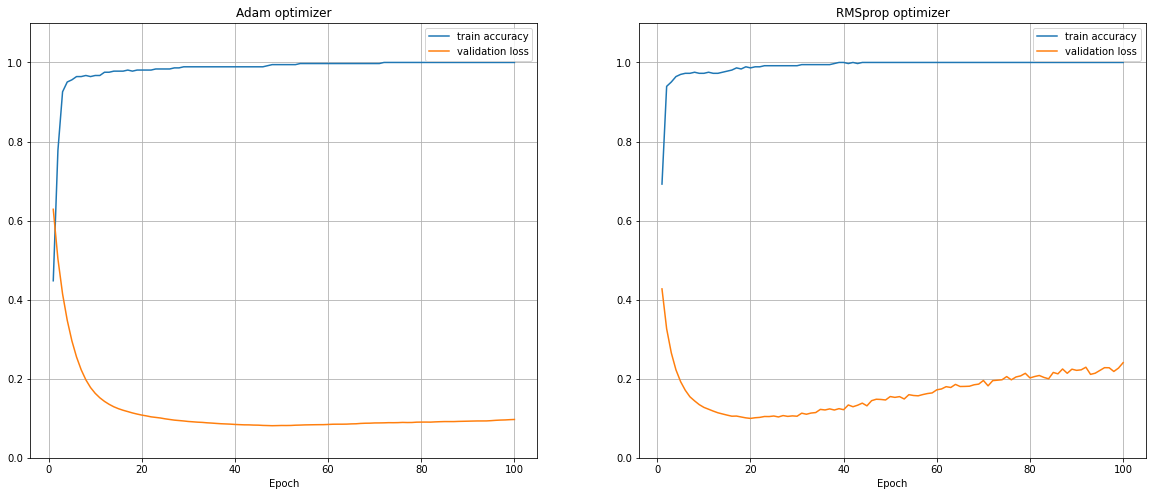

In [18]:
plt.figure(figsize=(20,8))
plt.subplot(121)
plt.plot(xs, y_acc, label='train accuracy')
plt.plot(xs, y_vloss, label='validation loss')
plt.legend()
plt.grid()
plt.ylim([0,1.1])
plt.xlabel('Epoch')
plt.title('Adam optimizer')

plt.subplot(122)
plt.plot(xs, y_acc_2, label='train accuracy')
plt.plot(xs, y_vloss_2, label='validation loss')
plt.legend()
plt.grid()
plt.ylim([0,1.1])
plt.xlabel('Epoch')
plt.title('RMSprop optimizer')
plt.show()